In [55]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


range_d = ctrl.Antecedent(np.arange(0, 100, 1), 'range')
angle_a = ctrl.Antecedent(np.arange(0, 90, 1), 'angle')
air_resistance_k = ctrl.Antecedent(np.arange(0, 1, 0.01), 'air_resistance')
initial_velocity = ctrl.Consequent(np.arange(0, 60, 1), 'initial_velocity')

range_d['low'] = fuzz.trimf(range_d.universe, [0, 0, 50])
range_d['medium'] = fuzz.trimf(range_d.universe, [0, 50, 100])
range_d['high'] = fuzz.trimf(range_d.universe, [0, 100, 100])

angle_a['low'] = fuzz.trimf(angle_a.universe, [0, 0, 45])
angle_a['medium'] = fuzz.trimf(angle_a.universe, [0, 45, 90])
angle_a['high'] = fuzz.trimf(angle_a.universe, [45, 90, 90])

air_resistance_k['low'] = fuzz.trimf(air_resistance_k.universe, [0, 0, 1])
air_resistance_k['high'] = fuzz.trimf(air_resistance_k.universe, [0, 1, 1])

initial_velocity['low'] = fuzz.trimf(initial_velocity.universe, [0, 0, 30])
initial_velocity['medium'] = fuzz.trimf(initial_velocity.universe, [0, 30, 60])
initial_velocity['high'] = fuzz.trimf(initial_velocity.universe, [30, 60, 60])

rule1 = ctrl.Rule(range_d['low'] & angle_a['low'] & air_resistance_k['low'], initial_velocity['low'])
rule2 = ctrl.Rule(range_d['low'] & angle_a['low'] & air_resistance_k['high'], initial_velocity['medium'])
rule3 = ctrl.Rule(range_d['low'] & angle_a['medium'] & air_resistance_k['low'], initial_velocity['low'])
rule4 = ctrl.Rule(range_d['low'] & angle_a['medium'] & air_resistance_k['high'], initial_velocity['low'])
rule5 = ctrl.Rule(range_d['low'] & angle_a['high'] & air_resistance_k['low'], initial_velocity['low'])
rule6 = ctrl.Rule(range_d['low'] & angle_a['high'] & air_resistance_k['high'], initial_velocity['low'])

rule7 = ctrl.Rule(range_d['medium'] & angle_a['low'] & air_resistance_k['low'], initial_velocity['medium'])
rule8 = ctrl.Rule(range_d['medium'] & angle_a['low'] & air_resistance_k['high'], initial_velocity['medium'])
rule9 = ctrl.Rule(range_d['medium'] & angle_a['medium'] & air_resistance_k['low'], initial_velocity['low'])
rule10 = ctrl.Rule(range_d['medium'] & angle_a['medium'] & air_resistance_k['high'], initial_velocity['low'])
rule11 = ctrl.Rule(range_d['medium'] & angle_a['high'] & air_resistance_k['low'], initial_velocity['medium'])
rule12 = ctrl.Rule(range_d['medium'] & angle_a['high'] & air_resistance_k['high'], initial_velocity['medium'])

rule13 = ctrl.Rule(range_d['high'] & angle_a['low'] & air_resistance_k['low'], initial_velocity['high'])
rule14 = ctrl.Rule(range_d['high'] & angle_a['low'] & air_resistance_k['high'], initial_velocity['high'])
rule15 = ctrl.Rule(range_d['high'] & angle_a['medium'] & air_resistance_k['low'], initial_velocity['medium'])
rule16 = ctrl.Rule(range_d['high'] & angle_a['medium'] & air_resistance_k['high'], initial_velocity['medium'])
rule17 = ctrl.Rule(range_d['high'] & angle_a['high'] & air_resistance_k['low'], initial_velocity['high'])
rule18 = ctrl.Rule(range_d['high'] & angle_a['high'] & air_resistance_k['high'], initial_velocity['high'])

initial_velocity_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, 
                                            rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18])
initial_velocity_simulation = ctrl.ControlSystemSimulation(initial_velocity_ctrl)

initial_velocity_simulation.input['range'] = 100
initial_velocity_simulation.input['angle'] = 30
initial_velocity_simulation.input['air_resistance'] = 0.2

initial_velocity_simulation.compute()

initial_velocity_simulation.output['initial_velocity']

31.225078345035513

In [56]:
def calculate_initial_velocity(d, a):
    g = 9.81
    v = np.sqrt((d * g) / np.sin(2 * np.deg2rad(a)))
    return v

In [57]:
d = 100
a = 30
air = 0.2
model_values = []
equasion_value = []

v_eq = calculate_initial_velocity(d, a)

initial_velocity_simulation.input['range'] = d
initial_velocity_simulation.input['angle'] = a
initial_velocity_simulation.input['air_resistance'] = air

initial_velocity_simulation.compute()

v_ml = initial_velocity_simulation.output['initial_velocity']

print(f"V wzoru {v_eq}, V modelu {v_ml}, dane wejściowe: odległość {d}, kąt {a}, opór powietrza {air}")
model_values.append(v_ml)
equasion_value.append(v_eq)

V wzoru 33.65651836049067, V modelu 31.225078345035513, dane wejściowe: odległość 100, kąt 30, opór powietrza 0.2


In [58]:
d = 100
a = 45
air = 0.2

v_eq = calculate_initial_velocity(d, a)

initial_velocity_simulation.input['range'] = d
initial_velocity_simulation.input['angle'] = a
initial_velocity_simulation.input['air_resistance'] = air

initial_velocity_simulation.compute()

v_ml = initial_velocity_simulation.output['initial_velocity']

print(f"V wzoru {v_eq}, V modelu {v_ml}, dane wejściowe: odległość {d}, kąt {a}, opór powietrza {air}")
model_values.append(v_ml)
equasion_value.append(v_eq)

V wzoru 31.32091952673165, V modelu 29.97271745002701, dane wejściowe: odległość 100, kąt 45, opór powietrza 0.2


In [59]:
d = 100
a = 60
air = 0.2

v_eq = calculate_initial_velocity(d, a)

initial_velocity_simulation.input['range'] = d
initial_velocity_simulation.input['angle'] = a
initial_velocity_simulation.input['air_resistance'] = air

initial_velocity_simulation.compute()

v_ml = initial_velocity_simulation.output['initial_velocity']

print(f"V wzoru {v_eq}, V modelu {v_ml}, dane wejściowe: odległość {d}, kąt {a}, opór powietrza {air}")
model_values.append(v_ml)
equasion_value.append(v_eq)

V wzoru 33.65651836049067, V modelu 31.225078345035513, dane wejściowe: odległość 100, kąt 60, opór powietrza 0.2


In [60]:
d = 50
a = 30
air = 0.2

v_eq = calculate_initial_velocity(d, a)

initial_velocity_simulation.input['range'] = d
initial_velocity_simulation.input['angle'] = a
initial_velocity_simulation.input['air_resistance'] = air

initial_velocity_simulation.compute()

v_ml = initial_velocity_simulation.output['initial_velocity']

print(f"V wzoru {v_eq}, V modelu {v_ml}, dane wejściowe: odległość {d}, kąt {a}, opór powietrza {air}")
model_values.append(v_ml)
equasion_value.append(v_eq)

V wzoru 23.7987523638325, V modelu 26.34456928838952, dane wejściowe: odległość 50, kąt 30, opór powietrza 0.2


In [61]:
d = 50
a = 45
air = 0.2

v_eq = calculate_initial_velocity(d, a)

initial_velocity_simulation.input['range'] = d
initial_velocity_simulation.input['angle'] = a
initial_velocity_simulation.input['air_resistance'] = air

initial_velocity_simulation.compute()

v_ml = initial_velocity_simulation.output['initial_velocity']

print(f"V wzoru {v_eq}, V modelu {v_ml}, dane wejściowe: odległość {d}, kąt {a}, opór powietrza {air}")
model_values.append(v_ml)
equasion_value.append(v_eq)

V wzoru 22.147234590350102, V modelu 24.173945925505762, dane wejściowe: odległość 50, kąt 45, opór powietrza 0.2


In [62]:
d = 50
a = 60
air = 0.2

v_eq = calculate_initial_velocity(d, a)

initial_velocity_simulation.input['range'] = d
initial_velocity_simulation.input['angle'] = a
initial_velocity_simulation.input['air_resistance'] = air

initial_velocity_simulation.compute()

v_ml = initial_velocity_simulation.output['initial_velocity']

print(f"V wzoru {v_eq}, V modelu {v_ml}, dane wejściowe: odległość {d}, kąt {a}, opór powietrza {air}")
model_values.append(v_ml)
equasion_value.append(v_eq)

V wzoru 23.7987523638325, V modelu 26.34456928838952, dane wejściowe: odległość 50, kąt 60, opór powietrza 0.2


In [63]:
d = 50
a = 80
air = 0.2

v_eq = calculate_initial_velocity(d, a)

initial_velocity_simulation.input['range'] = d
initial_velocity_simulation.input['angle'] = a
initial_velocity_simulation.input['air_resistance'] = air

initial_velocity_simulation.compute()

v_ml = initial_velocity_simulation.output['initial_velocity']

print(f"V wzoru {v_eq}, V modelu {v_ml}, dane wejściowe: odległość {d}, kąt {a}, opór powietrza {air}")
model_values.append(v_ml)
equasion_value.append(v_eq)

V wzoru 37.869856855815996, V modelu 31.79427009170131, dane wejściowe: odległość 50, kąt 80, opór powietrza 0.2


In [64]:
d = 50
a = 10
air = 0.2

v_eq = calculate_initial_velocity(d, a)

initial_velocity_simulation.input['range'] = d
initial_velocity_simulation.input['angle'] = a
initial_velocity_simulation.input['air_resistance'] = air

initial_velocity_simulation.compute()

v_ml = initial_velocity_simulation.output['initial_velocity']

print(f"V wzoru {v_eq}, V modelu {v_ml}, dane wejściowe: odległość {d}, kąt {a}, opór powietrza {air}")
model_values.append(v_ml)
equasion_value.append(v_eq)

V wzoru 37.869856855816, V modelu 31.79427009170131, dane wejściowe: odległość 50, kąt 10, opór powietrza 0.2


In [65]:
d = 20
a = 30
air = 0.2

v_eq = calculate_initial_velocity(d, a)

initial_velocity_simulation.input['range'] = d
initial_velocity_simulation.input['angle'] = a
initial_velocity_simulation.input['air_resistance'] = air

initial_velocity_simulation.compute()

v_ml = initial_velocity_simulation.output['initial_velocity']

print(f"V wzoru {v_eq}, V modelu {v_ml}, dane wejściowe: odległość {d}, kąt {a}, opór powietrza {air}")
model_values.append(v_ml)
equasion_value.append(v_eq)

V wzoru 15.051652588005386, V modelu 24.49130434782611, dane wejściowe: odległość 20, kąt 30, opór powietrza 0.2


In [66]:
d = 20
a = 45
air = 0.2

v_eq = calculate_initial_velocity(d, a)

initial_velocity_simulation.input['range'] = d
initial_velocity_simulation.input['angle'] = a
initial_velocity_simulation.input['air_resistance'] = air

initial_velocity_simulation.compute()

v_ml = initial_velocity_simulation.output['initial_velocity']

print(f"V wzoru {v_eq}, V modelu {v_ml}, dane wejściowe: odległość {d}, kąt {a}, opór powietrza {air}")
model_values.append(v_ml)
equasion_value.append(v_eq)

V wzoru 14.007141035914502, V modelu 21.06248131539614, dane wejściowe: odległość 20, kąt 45, opór powietrza 0.2


In [67]:
d = 20
a = 60
air = 0.2

v_eq = calculate_initial_velocity(d, a)

initial_velocity_simulation.input['range'] = d
initial_velocity_simulation.input['angle'] = a
initial_velocity_simulation.input['air_resistance'] = air

initial_velocity_simulation.compute()

v_ml = initial_velocity_simulation.output['initial_velocity']

print(f"V wzoru {v_eq}, V modelu {v_ml}, dane wejściowe: odległość {d}, kąt {a}, opór powietrza {air}")
model_values.append(v_ml)
equasion_value.append(v_eq)

V wzoru 15.051652588005384, V modelu 24.49130434782611, dane wejściowe: odległość 20, kąt 60, opór powietrza 0.2


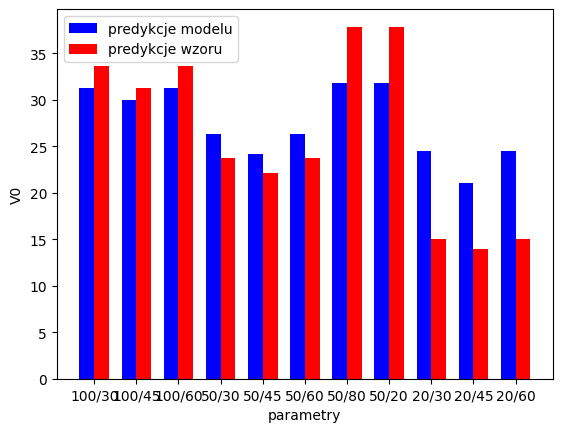

In [68]:
import matplotlib.pyplot as plt

x = ['100/30', '100/45', '100/60', '50/30', '50/45','50/60', '50/80', '50/20', '20/30', '20/45', '20/60']

szerokosc_slupka = 0.35

plt.bar([i for i in range(len(x))], model_values, szerokosc_slupka, color='blue', label='predykcje modelu')
plt.bar([i + szerokosc_slupka for i in range(len(x))], equasion_value, szerokosc_slupka, color='red', label='predykcje wzoru')

plt.xticks([i + szerokosc_slupka / 2 for i in range(len(x))], x)

plt.legend()

plt.xlabel('parametry')
plt.ylabel('V0')

plt.show()